### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image
from torch_geometric.loader import DataLoader

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

%run graphUtils.py
%run Visualizer.py # --allows for reloading the particular code
#%run CGConv.py

#### Train the network

In [2]:
n = 10
popsize = 10
generations = 1000
batch_size = 2
wrap_around = True
name = 'centered14'
#device = torch.device('mps')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, batch_size, True, popsize)

2023-03-12 21:46:35,477	INFO worker.py:1528 -- Started a local Ray instance.


[2023-03-12 21:46:37] INFO     <72522> evotorch.core: Instance of `Custom_NEProblem` (id:4434808592) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-03-12 21:46:37] INFO     <72522> evotorch.core: Instance of `Custom_NEProblem` (id:4434808592) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-03-12 21:46:37] INFO     <72522> evotorch.core: Instance of `Custom_NEProblem` (id:4434808592) -- The `device` of the problem is set as cpu
[2023-03-12 21:46:37] INFO     <72522> evotorch.core: Instance of `Custom_NEProblem` (id:4434808592) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-03-12 21:46:37] INFO     <72522> evotorch.core: Instance of `Custom_NEProblem` (id:4434808592) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.0394)
  median_eval : 6.224466323852539
    mean_eval : 8.127726554870605
pop_best_eval : 12.585994720458984

         iter : 2
     stepsize : ReadOnlyTensor(0.0388)
  median_eval : 8.954110145568848
    mean_eval : 9.86754035949707
pop_best_eval : 14.868427276611328

         iter : 3
     stepsize : ReadOnlyTensor(0.0383)
  median_eval : 10.288717269897461
    mean_eval : 10.781344413757324
pop_best_eval : 14.029914855957031

         iter : 4
     stepsize : ReadOnlyTensor(0.0379)
  median_eval : 10.929420471191406
    mean_eval : 12.052947998046875
pop_best_eval : 17.7486572265625

         iter : 5
     stepsize : ReadOnlyTensor(0.0374)
  median_eval : 8.87824821472168
    mean_eval : 9.673844337463379
pop_best_eval : 12.209203720092773

         iter : 6
     stepsize : ReadOnlyTensor(0.0370)
  median_eval : 8.000862121582031
    mean_eval : 8.9608736038208
pop_best_eval : 10.8996000289917

         iter : 7
     stepsize : Read

In [4]:
network = trainer.get_trained_network()

In [5]:
#trainer.logger_df.from_csv('../logger/' + name + '.csv')
network.load_state_dict(torch.load('../models/' + name + '.pth'))

<All keys matched successfully>

In [6]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'][0])
network = trainer.problem.parameterize_net(trainer.searcher.status['center'][0])
#network = trainer.problem.parameterize_net(trainer.searcher.status['obj0_pop_best'])

In [7]:
#trainer.searcher.status

#### Visualize trained network

In [8]:
v_batch_size= 2
graphs = [generate_organism(n, device).toGraph() for _ in range(v_batch_size)]
loader = DataLoader(graphs, batch_size=v_batch_size)
graph = next(iter(loader))
visualizer = Visualizer(wrap_around, v_batch_size)
network.batch_size = v_batch_size
network(graph, 0)

DataBatch(x=[120, 5], edge_index=[1, 0], device=[2], subsize=[2], energy=[2], velocity=[2], border_cost=[2], food_reward=[2], dead_cost=[2], visible_food=[2], food_avg_dist=[2], food_avg_degree=[2], food_search_movement=[2], batch=[120], ptr=[3])

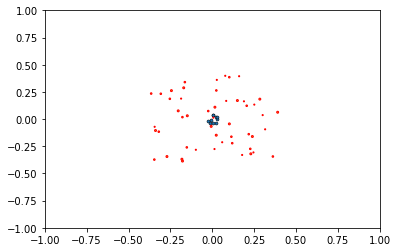

In [9]:
anim = visualizer.animate_organism(graph, network, food=30, frames=200)
visualizer.save_animation_to_gif(anim, name, 10)

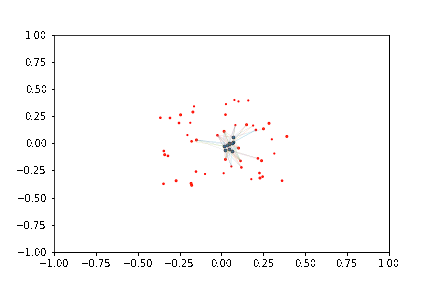

In [10]:
Image('../animation/' + name + '.gif')

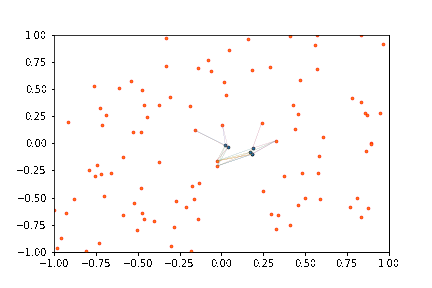

In [11]:
Image('../animation/GATConv1.gif')

In [12]:
anim.frame_seq = anim.new_saved_frame_seq() 
IPython.display.HTML(anim.to_jshtml())

In [13]:
print(network)

CGConv1(
  (conv_layer_food): CustomConvSimple(2, dim=3)
  (conv_layer_cell): CustomConvSimple(2, dim=3)
  (mlp_before): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Tanh()
  )
  (mlp_middle): Sequential(
    (0): Linear(in_features=4, out_features=2, bias=True)
    (1): Tanh()
  )
  (mlp): Sequential(
    (0): Tanh()
    (1): Linear(in_features=2, out_features=2, bias=True)
    (2): Tanh()
  )
  (gConvGRU): GConvGRU(
    (conv_x_z): ChebConv(2, 2, K=1, normalization=sym)
    (conv_h_z): ChebConv(2, 2, K=1, normalization=sym)
    (conv_x_r): ChebConv(2, 2, K=1, normalization=sym)
    (conv_h_r): ChebConv(2, 2, K=1, normalization=sym)
    (conv_x_h): ChebConv(2, 2, K=1, normalization=sym)
    (conv_h_h): ChebConv(2, 2, K=1, normalization=sym)
  )
  (mlp_edge): Sequential(
    (0): Linear(in_features=3, out_features=3, bias=True)
    (1): Tanh()
    (2): Linear(in_features=3, out_features=3, bias=True)
    (3): Tanh()
  )
  (conv_layer_cells): CustomConv

In [14]:
print('GConvGRU: ', network.gConvGRU)
for param in network.gConvGRU.parameters():
  print(param.data)


GConvGRU:  GConvGRU(
  (conv_x_z): ChebConv(2, 2, K=1, normalization=sym)
  (conv_h_z): ChebConv(2, 2, K=1, normalization=sym)
  (conv_x_r): ChebConv(2, 2, K=1, normalization=sym)
  (conv_h_r): ChebConv(2, 2, K=1, normalization=sym)
  (conv_x_h): ChebConv(2, 2, K=1, normalization=sym)
  (conv_h_h): ChebConv(2, 2, K=1, normalization=sym)
)
tensor([0.8583, 0.9033])
tensor([[ 0.1097,  0.7393],
        [-1.2037,  0.2749]])
tensor([ 0.0975, -0.8039])
tensor([[ 1.0199,  1.4446],
        [-0.3666, -0.7481]])
tensor([-0.3530, -0.2102])
tensor([[-0.0783,  0.9457],
        [-0.1280,  0.0216]])
tensor([-0.1930,  0.2587])
tensor([[0.4948, 0.1918],
        [0.0916, 0.5780]])
tensor([-0.2555, -0.2551])
tensor([[-0.2871, -0.1109],
        [-0.1121,  0.6153]])
tensor([0.7699, 0.4335])
tensor([[ 0.4397, -0.5032],
        [-0.5512, -0.5536]])


In [15]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

#### Visualization of loss:

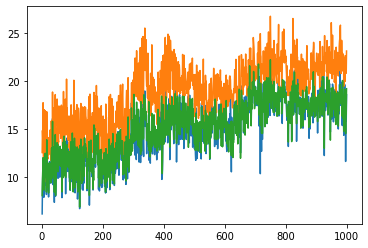

In [16]:
import matplotlib.pyplot as plt
losses = trainer.logger_df
#print(losses)
#plt.plot(losses.stepsize)

plt.plot(losses.median_eval)
plt.plot(losses.pop_best_eval)
plt.plot(losses.mean_eval)
#plt.legend(('median_eval', 'pop_best_eval', 'mean eval'))
plt.show()

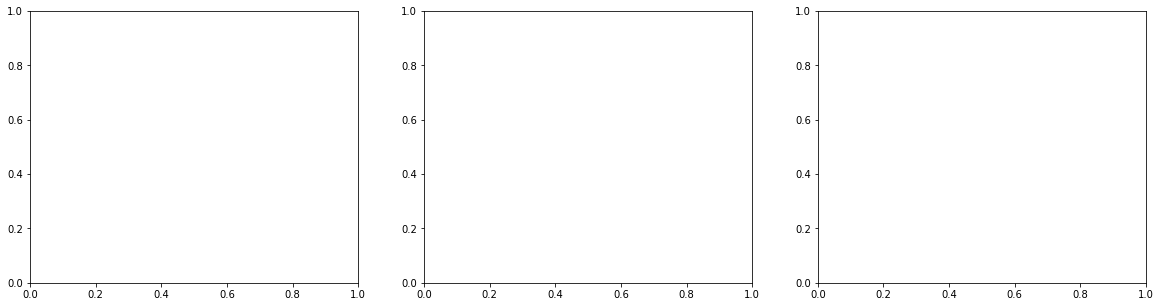

In [17]:
trainer.logger_df
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle('')
plt.show()